In [418]:
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [448]:
total_scores_gs = pickle.load(open('total_scores_gs.pickle','rb'))
monitoring = pickle.load(open('monitoring_gs.pickle','rb'))

EOFError: Ran out of input

In [444]:
for i in total_scores_gs.keys():
    print(i, len(total_scores_gs[i]), max(total_scores_gs[i]))

(928, 0.0001, 2, 500, 0.2, 0.99, 0.001, 1, 4, 0.01, 0.0001, 1.0, (256, 128)) 178 0.10000000149011612
(15, 0.01, 1, 300, 0.2, 0.99, 0.001, 10, 2, 0.001, 0.001, 1.0, (512, 256, 128)) 623 0.10000000149011612
(5, 0.003, 1, 1000, 1, 0.99, 0.01, 5, 3, 0.0001, 0.001, 1, (128, 128)) 502 0.10000000149011612
(888, 0.003, 1, 1000, 1, 0.99, 0.01, 2, 5, 0.0001, 0.001, 1, (128, 128)) 363 0.20000000298023224
(134, 0.003, 1, 1000, 1, 0.99, 0.01, 2, 5, 0.0001, 0.001, 1, (128, 128)) 8 0.09000000171363354
(928, 0.003, 1, 1000, 1, 0.99, 0.01, 2, 1, 0.0001, 0.001, 1, (128, 128)) 7 0.10000000149011612
(15, 0.003, 1, 1000, 1, 0.99, 0.01, 1, 4, 0.0001, 0.001, 1, (128, 128)) 6 0.10000000149011612
(6243, 0.003, 1, 1000, 1, 0.99, 0.01, 1, 5, 0.0001, 0.001, 1, (128, 128)) 55 0.10000000149011612
(8376, 0.003, 1, 1000, 1, 0.99, 0.01, 1, 4, 0.0001, 0.001, 1, (128, 128)) 6 0.10000000149011612
(15, 0.003, 1, 1000, 1, 0.99, 0.01, 1, 5, 0.0001, 0.001, 1, (128, 128)) 119 0.10000000149011612
(5, 0.003, 1, 1000, 1, 0.99, 0

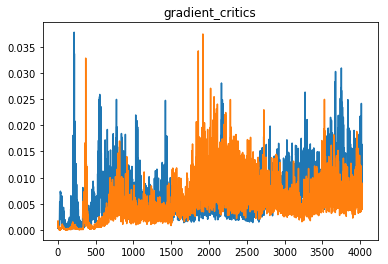

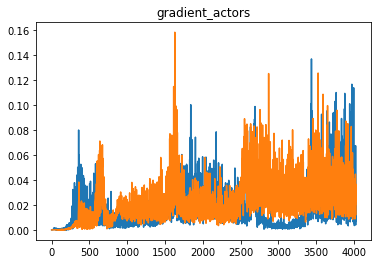

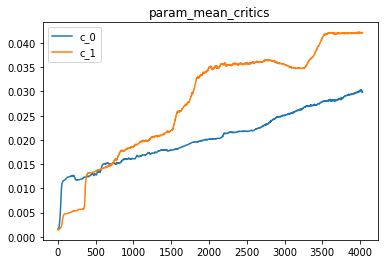

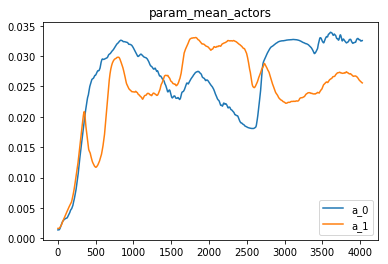

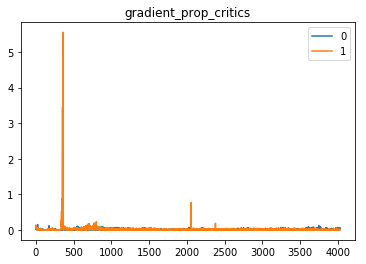

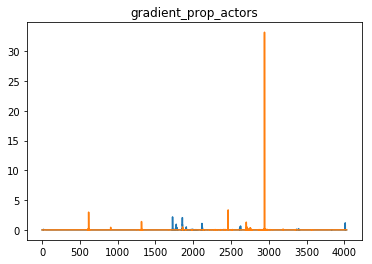

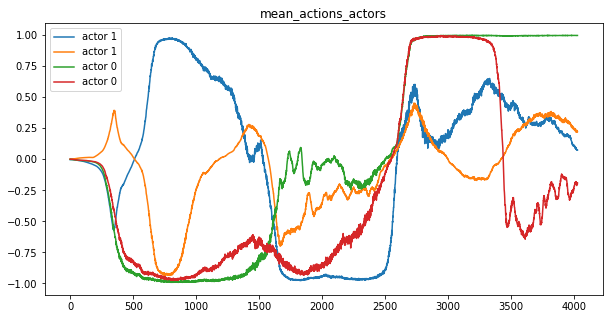

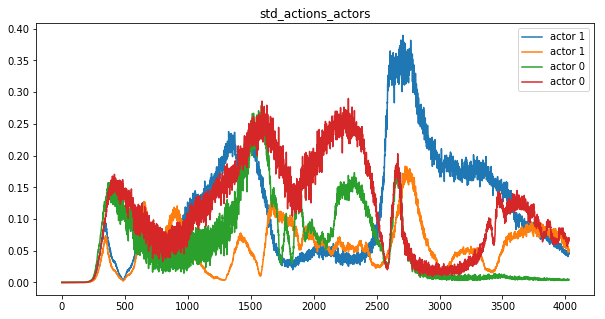

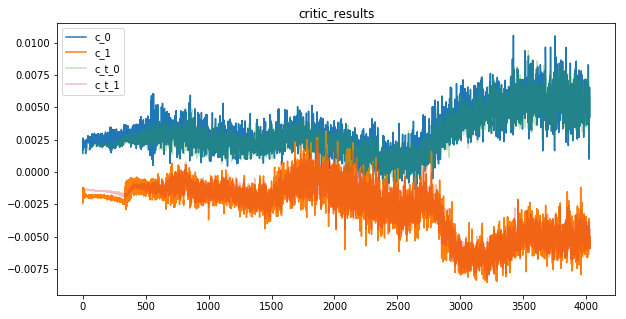

In [445]:
#i = (134, 3, 1000, 0.2, 0.99, 0.008, 10, 6, 0.001, 0.001, 10.0, (512, 256, 128))
plt.plot( monitoring[i]['gradient_critic_0'] )
plt.plot( monitoring[i]['gradient_critic_1'] )
plt.title('gradient_critics')
plt.figure()
plt.plot( monitoring[i]['gradient_actor_0'] )
plt.plot( monitoring[i]['gradient_actor_1'] )
plt.title('gradient_actors')

plt.figure()
plt.plot( monitoring[i]['param_mean_critic_0'], label='c_0' )
plt.plot( monitoring[i]['param_mean_critic_1'], label='c_1' )
plt.title('param_mean_critics')
plt.legend()
plt.figure()
plt.plot( monitoring[i]['param_mean_actor_0'] , label='a_0')
plt.plot( monitoring[i]['param_mean_actor_1'] , label='a_1')
plt.legend()
plt.title('param_mean_actors')

plt.figure()
plt.title('gradient_prop_critics')
plt.plot( monitoring[i]['gradient_prop_critic_0'], label='0' )
plt.plot( monitoring[i]['gradient_prop_critic_1'],label='1' )
plt.legend()
plt.figure()
plt.title('gradient_prop_actors')
plt.plot( monitoring[i]['gradient_prop_actor_0'] )
plt.plot( monitoring[i]['gradient_prop_actor_1'] )


plt.figure(figsize=(10,5))
plt.plot(monitoring[i]['mean_action_0_actor_1'], label='actor 1')
plt.plot(monitoring[i]['mean_action_1_actor_1'], label='actor 1')
plt.plot(monitoring[i]['mean_action_0_actor_0'], label='actor 0')
plt.plot(monitoring[i]['mean_action_1_actor_0'], label='actor 0')
plt.legend()
plt.title('mean_actions_actors')
plt.figure(figsize=(10,5))
plt.plot(monitoring[i]['std_action_0_actor_1'], label='actor 1')
plt.plot(monitoring[i]['std_action_1_actor_1'], label='actor 1')
plt.plot(monitoring[i]['std_action_0_actor_0'], label='actor 0')
plt.plot(monitoring[i]['std_action_1_actor_0'], label='actor 0')
plt.legend()
plt.title('std_actions_actors')

plt.figure(figsize=(10,5))
plt.plot(monitoring[i]['critic_result_0'], label='c_0')
plt.plot(monitoring[i]['critic_result_1'], label='c_1')
plt.plot(monitoring[i]['critic_target_result_0'], label='c_t_0', alpha=0.3)
plt.plot(monitoring[i]['critic_target_result_1'], label='c_t_1', alpha=0.3)
plt.title('critic_results')
plt.legend()

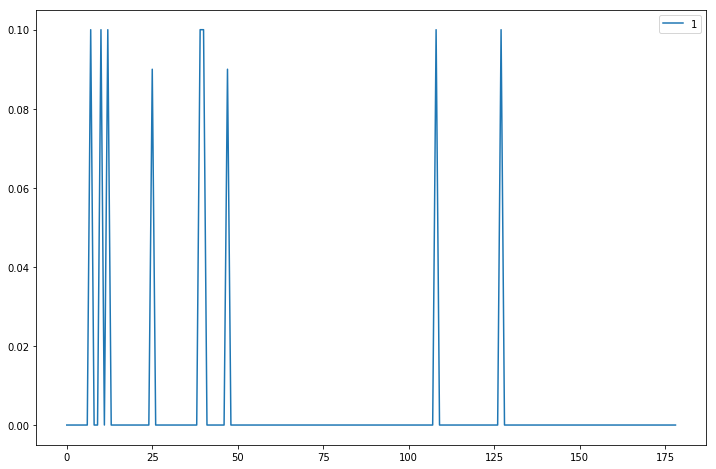

In [446]:
plt.figure(figsize=(12,8))
plt.plot(total_scores_gs[i], label='1')
# plt.xlim([500,800])
plt.legend()
# plt.plot(monitoring[i]['y_1'])